In [1]:
%matplotlib inline
from pylab import *

In [2]:
from scipy.linalg import solve
# To use solve, you can have a look at
# https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html#solving-linear-system
T = 1
_lambda = 1.5
a   = _lambda*T
e_a = exp(-a)
A   = array([[e_a,  a*e_a-1, a**2/2*e_a],
            [0,     e_a,     (1+a)*e_a-1],
            [1,     1,       1      ]])
####################################
# give the expression of the steady-state distribution
pi = solve(A, array([[0], [0], [1]]))
print('pi=',pi)
####################################

#----------
V1 = pi[2]


pi= [[0.61603236]
 [0.25519243]
 [0.12877521]]


In [3]:
#######################
# Enter P_loss_token
P_loss_token = pi[2] * e_a
#######################
V2 = P_loss_token

In [5]:
#######################
# Enter P_loss_client

P_loss_client = (_lambda- (1 - P_loss_token)/T)/_lambda
#######################
V3 = P_loss_client

Estimated clients loss probability =  0.34959839357429723


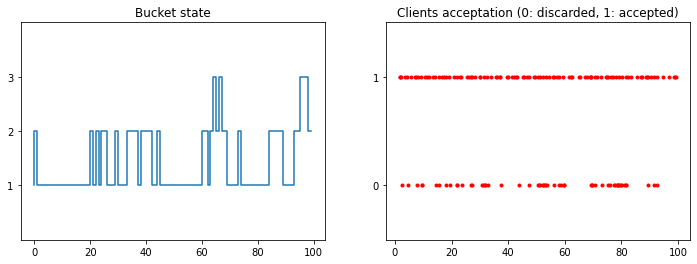

In [6]:
_lambda     = 1.5  # intensity of clients arrivals at the bucket
T     = 1.   # generation period of tokens
Bsize = 3    # bucket size 

def token_bucket(x0=1, Tmax=100):
    x       = [x0]  # bucket states at instants 0, t_1, t_2, ... 
                    # (just after the production of tokens)
    x_aux   = x[-1] # bucket state between t_n and t_{n+1}
    y       = []    # clients indicator: 1 --> enter the system, 0-->rejected)
                    # y permits
    t       = [(-1/_lambda)*log(rand())] # times of client arrivals
    n       = 0     # number of elapsed intervals of duration T
    while t[-1]<Tmax:
        # generate tokens until next client arrival:
        while t[-1]> n*T+T:
            n +=1 # increment time index
            # update the bucket state (add a new token in the bucket 
            # if it is not full yet):
            x.append(minimum(x_aux+1,Bsize))
            x_aux = x[-1]
        # check whether the new client enters the system or not:
        if x_aux>0: # the new client enters the system
            x_aux = x_aux-1
            y.append(1)
        else:       # the new client is rejected
            y.append(0)
        ####################################
        # generate time of arrival of a new client:
        t.append(t[-1] + (-1/_lambda)*log(rand()))
        ####################################   
    t = t[:-1] # discard time of arrival > Tmax
    return x, y, t

x, y, t = token_bucket()
figure(figsize=(12,4))
subplot(121)
step(T*arange(len(x)),x)
axis(ymin=0,ymax=4)
yticks([1,2,3],[1,2,3])
title("Bucket state")
subplot(122)
plot(t,y,'r.')
axis(ymin=-.5,ymax=1.5)
yticks([0,1],[0,1])
title("Clients acceptation (0: discarded, 1: accepted)")

#------
x,y,t = token_bucket(Tmax=10**4)
#########################
# Supply the estimate of clients loss probability
V4    = 1 - sum(y)/len(y)
#########################
print("Estimated clients loss probability = ",V4)

In [7]:
print("----------------------------------------------------\n"
      +"VALIDITY OF RESULTS SUPPLIED FOR WEEK III - Part II:\n"
      +"----------------------------------------------------")
results  = dict()
for k in range(1,5):
    results["V"+str(k)] = "NO"
try: 
    if abs(V1-.13)<.01:    results["V1"] =  "OK"
except: pass
try: 
    if abs(V2-.029)<.001:  results["V2"] =  "OK"
except: pass
try: 
    if abs(V3-.35)<.01:    results["V3"] =  "OK"
except: pass
try: 
    if abs(V4-.35)<.02:     results["V4"] =  "OK"
except: pass

for key,val in results.items():
    print(key,': ',val)

----------------------------------------------------
VALIDITY OF RESULTS SUPPLIED FOR WEEK III - Part II:
----------------------------------------------------
V1 :  OK
V2 :  OK
V3 :  OK
V4 :  OK
